In [1]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
from dwd.pipeline import Pipeline

# Create a pipeline for dwd-data and run it for 2020

In [2]:
pipeline = Pipeline(type='dwd')

In [3]:
START_DATE = date(2020, 1, 1)
END_DATE = date(2020, 12, 31)
df = pipeline.run(START_DATE, END_DATE)

# Plot the monthly air temperature per federal state for 2020

<AxesSubplot:xlabel='zeitachse'>

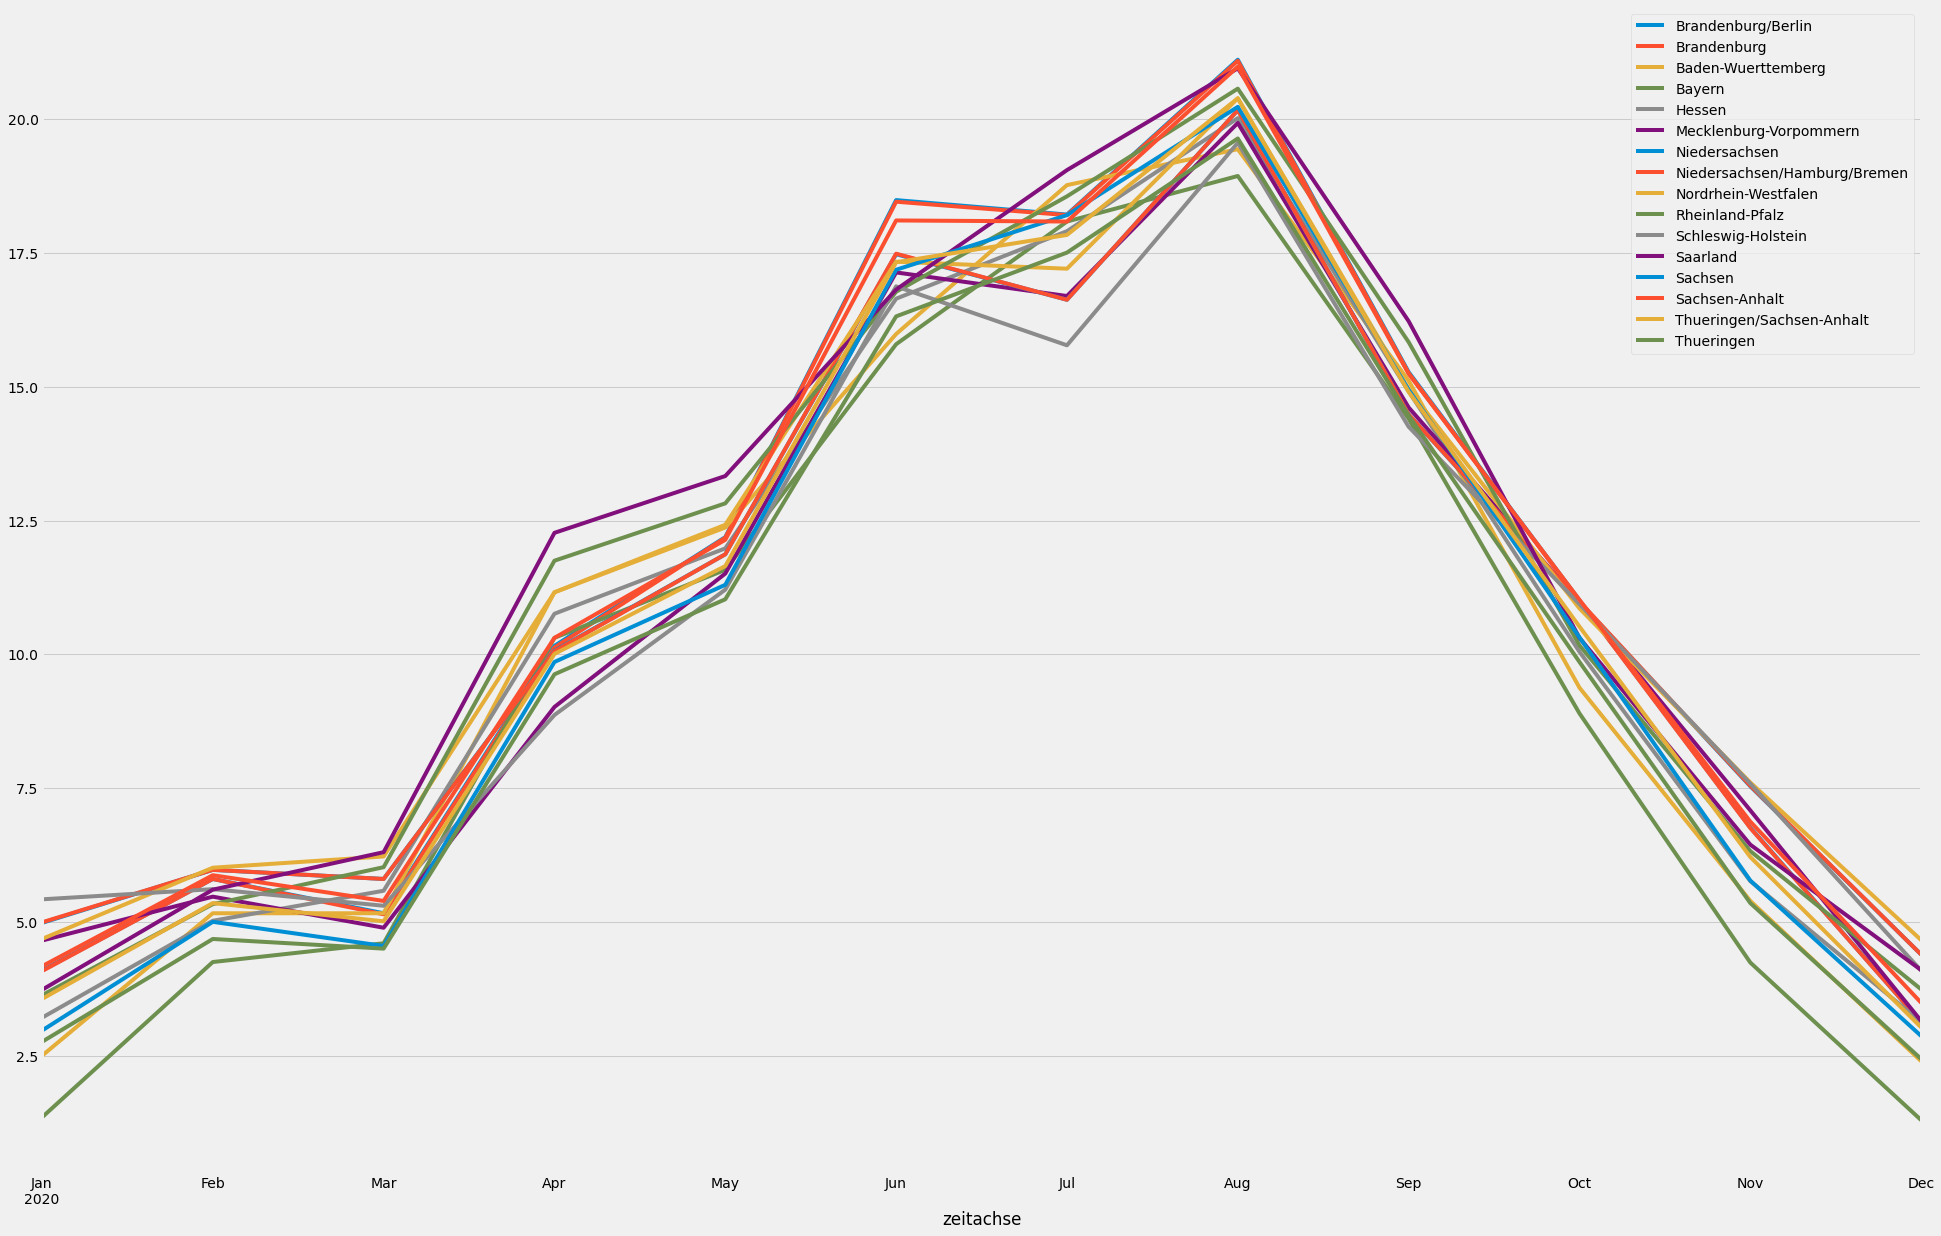

In [16]:
df_plot = df.copy(deep=True)
df_plot['zeitachse'] = pd.to_datetime(dict(year=df_plot.Jahr, month=df_plot.Monat, day=1))
df_plot.set_index("zeitachse", inplace=True)
df_plot = df_plot.loc[:, ~df_plot.columns.isin(['Jahr', 'Monat'])]
plt.style.use("fivethirtyeight")
df_plot.plot(figsize=(30, 20))

# Which federal state had the highest air temperature in August 2020?

In [19]:
df_max_value = df.copy(deep=True)
df_max_value = df_max_value[(df_max_value.Jahr==2020) & (df_max_value.Monat==8)]
df_max_value = df_max_value.loc[:, ~df.columns.isin(['Jahr', 'Monat'])].stack()
print('Hightest mean air temperature August 2020: {} degrees in {}'.format(df_max_value.max(), df_max_value.idxmax()[1]))

Hightest mean air temperature August 2020: 21.1 degrees in Brandenburg/Berlin
